# METHODOLOGY AND EXPERIMENTATION CPI FORECASTING

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#### Read File 

In [3]:
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )
data.head()


,All-items,Food,Shelter,Household operations,Clothing and footwear,Transportation,Gasoline,Health and personal care,Recreation & education,"Alcohol, tobacco & cannabis",All-items excluding food and energy,All-items excluding energy,Energy,Goods,Services
Date,,,,,,,,,,,,,,,
2003-01-01,102.0,101.6,102.1,100.1,96.6,105.5,108.4,100.5,99.3,106.8,101.5,101.5,108.3,101.9,102.1
2003-02-01,102.8,101.5,102.5,100.6,98.7,107.1,116.1,100.8,100.6,108.1,102.1,102.0,113.0,103.0,102.6
2003-03-01,103.1,101.7,103.2,100.6,100.3,107.6,117.2,100.5,100.3,108.3,102.3,102.2,115.3,103.6,102.7
2003-04-01,102.4,101.8,102.3,100.7,98.7,105.4,106.7,101.2,100.0,108.9,102.3,102.2,106.0,101.9,102.9
2003-05-01,102.5,102.1,102.9,100.6,98.3,104.0,99.3,101.4,100.7,110.2,102.5,102.4,103.7,101.8,103.2


#### Get Basic summary stastistics and information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2003-01-01 to 2023-04-01
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   All-items                             244 non-null    float64
 1   Food                                  244 non-null    float64
 2   Shelter                               244 non-null    float64
 3   Household operations                  244 non-null    float64
 4   Clothing and footwear                 244 non-null    float64
 5   Transportation                        244 non-null    float64
 6   Gasoline                              244 non-null    float64
 7   Health and personal care              244 non-null    float64
 8   Recreation & education                244 non-null    float64
 9   Alcohol, tobacco & cannabis           244 non-null    float64
 10  All-items excluding food and energy   244 non-null    float64
 11  

In [5]:
data.columns

Index(['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services '],
      dtype='object')

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
All-items,244.0,123.229508,13.362860,102.0,112.175,122.70,133.000,156.4
Food,244.0,132.002459,20.085299,100.7,112.600,131.80,144.700,183.1
Shelter,244.0,129.881148,16.165007,102.1,119.500,127.95,140.075,169.9
Household operations,244.0,114.036885,9.665732,100.1,104.000,114.05,122.725,133.7
Clothing and footwear,244.0,94.535246,2.662912,87.9,92.775,94.65,96.225,100.8
Transportation,244.0,128.072541,15.869033,103.7,116.700,127.35,137.125,176.2
Gasoline,244.0,161.768852,33.503064,99.3,142.525,157.40,183.350,299.4
Health and personal care,244.0,117.973361,10.583401,100.5,107.900,118.40,125.600,145.7
Recreation & education,244.0,108.413115,7.160660,99.1,102.075,106.40,114.500,127.1
"Alcohol, tobacco & cannabis",244.0,144.764754,21.909026,106.8,126.600,139.60,166.475,189.4


In [7]:
#checking for missing values
data.isnull().sum()

All-items                               0
Food                                    0
Shelter                                 0
Household operations                    0
Clothing and footwear                   0
Transportation                          0
Gasoline                                0
Health and personal care                0
Recreation & education                  0
Alcohol, tobacco & cannabis             0
All-items excluding food and energy     0
All-items excluding energy              0
Energy                                  0
Goods                                   0
Services                                0
dtype: int64

# PROPOSED MODEL 

### Attention LSTM Encoder Decorder

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, TimeDistributed, Embedding, Flatten, Activation, Dot, Concatenate
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping


# Split the data into training and testing sets (training set first 232 months then test last 6 months)
train_data = data.iloc[:238]
test_data = data.iloc[238:]

# Define the model architecture
input_seq = Input(shape=(None, 1))
encoder_lstm = LSTM(64, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(input_seq)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, 1))
decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

attention_layer = Dot(axes=[2, 2])([decoder_outputs, encoder_outputs])
attention_weights = Activation('softmax')(attention_layer)

context_vector = Dot(axes=[2, 1])([attention_weights, encoder_outputs])
decoder_combined_context = Concatenate(axis=-1)([context_vector, decoder_outputs])

output = TimeDistributed(Dense(1, activation='linear'))(decoder_combined_context)

model = Model([input_seq, decoder_inputs], output)
model.compile(optimizer='adam', loss='mse')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit([train_data.values[:-1, :, np.newaxis], train_data.values[1:, :, np.newaxis]],
          train_data.values[1:, :, np.newaxis],
          epochs=500, batch_size=1,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/500
189/189 [==============================] - 3s 8ms/step - loss: 11728.0234 - val_loss: 13704.2061
Epoch 2/500
189/189 [==============================] - 1s 5ms/step - loss: 7019.8140 - val_loss: 9819.6748
Epoch 3/500
189/189 [==============================] - 1s 5ms/step - loss: 4531.4717 - val_loss: 7070.9297
Epoch 4/500
189/189 [==============================] - 1s 5ms/step - loss: 2890.5869 - val_loss: 5157.7427
Epoch 5/500
189/189 [==============================] - 1s 5ms/step - loss: 1825.4054 - val_loss: 3822.2441
Epoch 6/500
189/189 [==============================] - 1s 6ms/step - loss: 1158.8777 - val_loss: 2892.6152
Epoch 7/500
189/189 [==============================] - 2s 8ms/step - loss: 763.4839 - val_loss: 2277.4006
Epoch 8/500
189/189 [==============================] - 1s 6ms/step - loss: 545.6786 - val_loss: 1869.9720
Epoch 9/500
189/189 [==============================] - 1s 6ms/step - loss: 431.2747 - val_loss: 1599.4341
Epoch 10/500
189/189 [================

In [10]:
preds = model.predict([test_data.values[:-1, :, np.newaxis], test_data.values[:-1, :, np.newaxis]])

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
predictions = preds.squeeze()
test_values = test_data.values[1:, :, np.newaxis].squeeze()
mae = mean_absolute_error(test_values, predictions)
smape = 100 * np.mean(2 * np.abs(predictions - test_values) / (np.abs(predictions) + np.abs(test_values)))
rmse = np.sqrt(mean_squared_error(test_values, predictions))
r2 = r2_score(test_values, predictions)
print("MAE:", mae)
print("SMAPE:", smape)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2.5143678588867187
SMAPE: 1.4191030885221665
RMSE: 5.168789613097305
R2 Score: -1.9219703934570493


#### Predicted Outputs 

In [15]:
result_df = pd.DataFrame(columns=['CPI Indicator', 'Actual', 'Predicted'])
for column in data.columns:
    # Prepare the input data for prediction
    input_data = test_data[[column]].values[:-1, :, np.newaxis]
    
    # Predict the values
    predicted_values = model.predict([input_data, input_data])
    
    # Get the actual values
    actual_values = test_data[[column]].values[1:]
    
    # Flatten the arrays for easier comparison
    predicted_values = predicted_values.flatten()
    actual_values = actual_values.flatten()
    
    # Create a DataFrame with the actual and predicted values for the column
    column_df = pd.DataFrame({'CPI Indicator': [column]*len(actual_values),
                              'Actual': actual_values,
                              'Predicted': predicted_values})
    
    # Append the column DataFrame to the result DataFrame
    result_df = result_df.append(column_df, ignore_index=True)
result_df

,CPI Indicator,Actual,Predicted
0,All-items,153.1,140.053223
1,All-items,153.9,139.868225
2,All-items,154.5,140.032913
3,All-items,155.3,140.153976
4,All-items,156.4,140.312149
...,...,...,...
70,Services,166.0,142.037399
71,Services,166.1,142.109512
72,Services,166.8,142.123795
73,Services,167.6,142.222717


# BASELINE COMPARED MODELS

In [8]:
#preprocessing 
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

In [9]:
#Split the data into train and test sets
train_data = data.iloc[:-6]  # Use all but the last 6 months for training
test_data = data.iloc[-6:]  # Use the last 6 months for testing



### Vector Auto Regression Model (VAR)

In [12]:
from statsmodels.tsa.vector_ar.var_model import VAR
#Estimate the VAR model
model = VAR(train_data)
lag_order = model.select_order()
selected_order = lag_order.aic  # Extract the selected lag order value based on AIC
var_model = model.fit(selected_order)

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Component: All-items


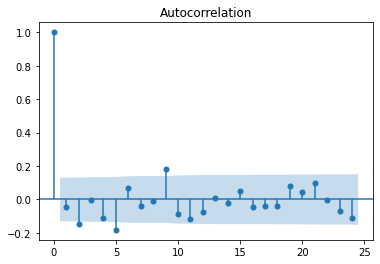

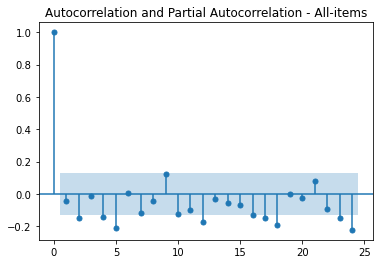

Component: Food 


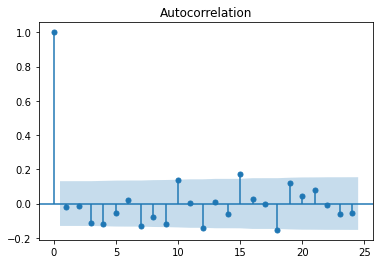

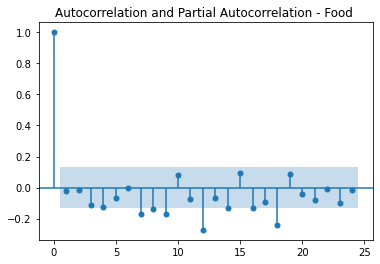

Component: Shelter


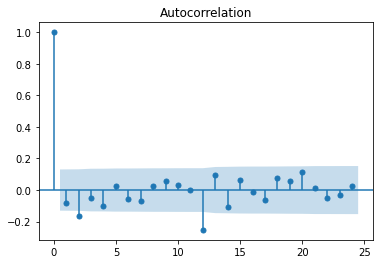

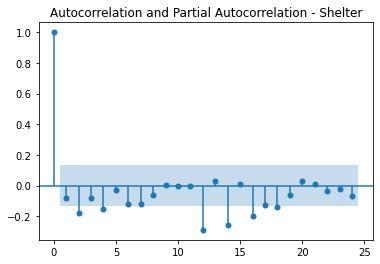

Component: Household operations


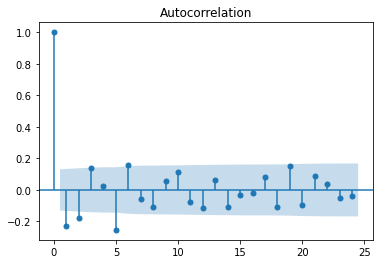

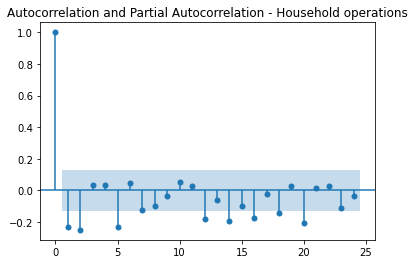

Component: Clothing and footwear


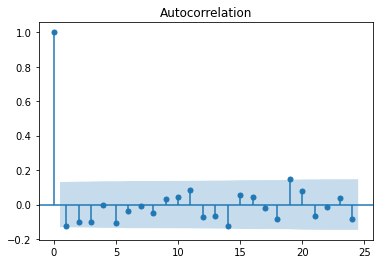

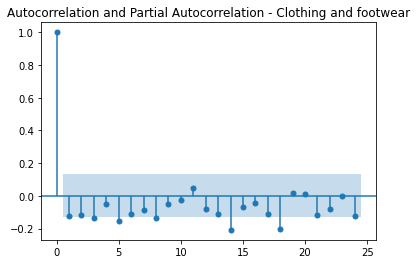

Component: Transportation


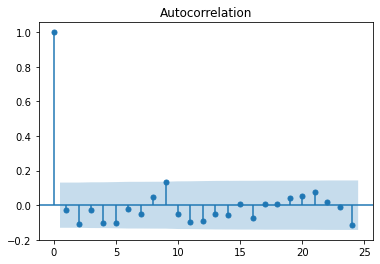

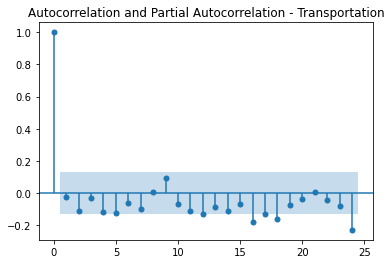

Component: Gasoline


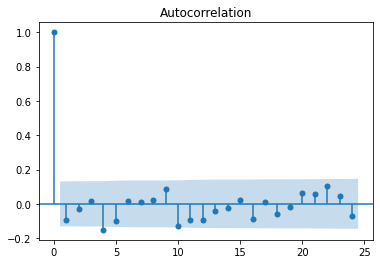

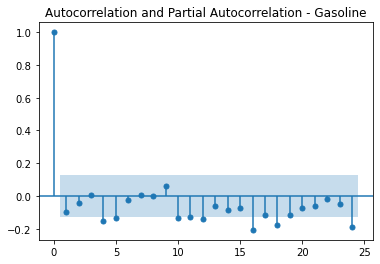

Component: Health and personal care


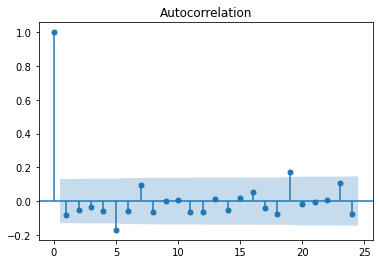

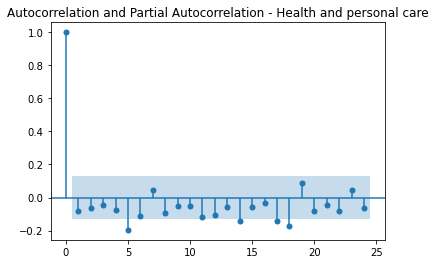

Component: Recreation & education 


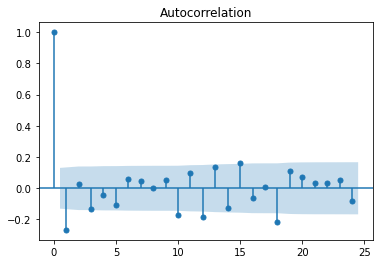

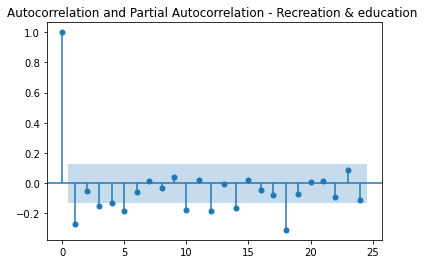

Component: Alcohol, tobacco & cannabis


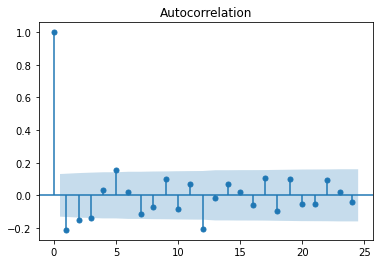

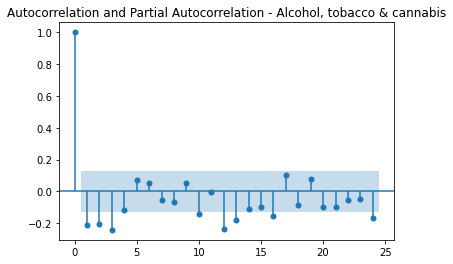

Component: All-items excluding food and energy 


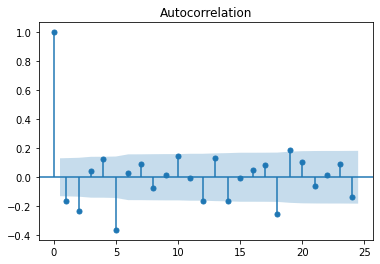

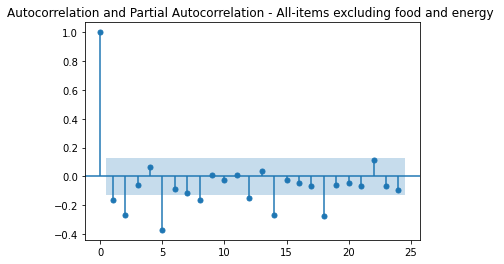

Component: All-items excluding energy 


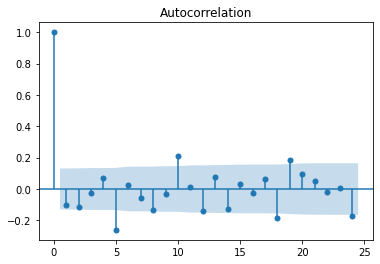

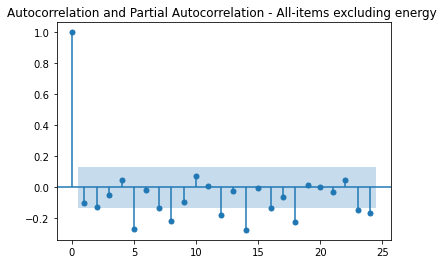

Component: Energy


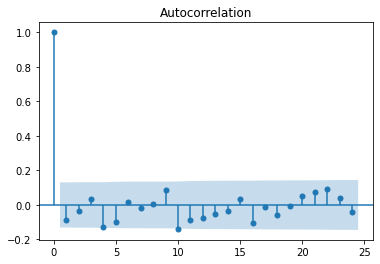

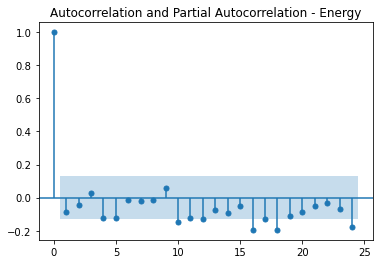

Component: Goods


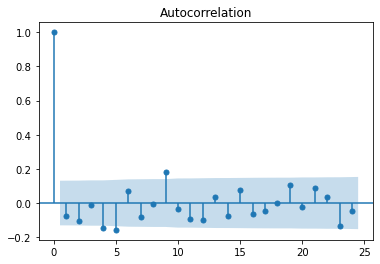

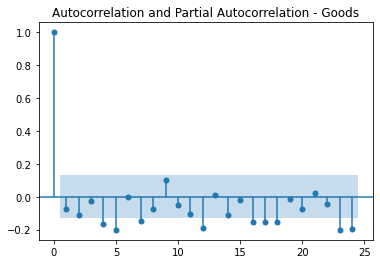

Component: Services 


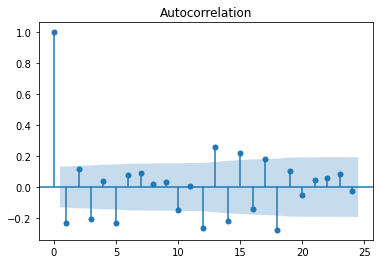

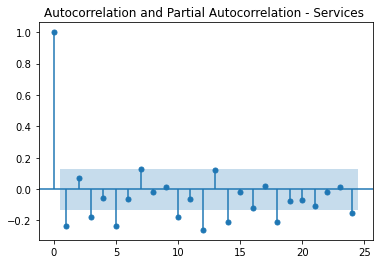

In [13]:
#Check model residuals
residuals = var_model.resid
for component in cpi_components:
    print(f'Component: {component}')
    plot_acf(residuals[component])
    plot_pacf(residuals[component])
    plt.title(f'Autocorrelation and Partial Autocorrelation - {component}')
    plt.show()

In [14]:
#Forecasting
n_forecast_periods = len(test_data)  # Number of periods to forecast
forecast = var_model.forecast(var_model.y, steps=n_forecast_periods)
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=cpi_components)
forecast_df

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


,All-items,Food,Shelter,Household operations,Clothing and footwear,Transportation,Gasoline,Health and personal care,Recreation & education,"Alcohol, tobacco & cannabis",All-items excluding food and energy,All-items excluding energy,Energy,Goods,Services
Date,,,,,,,,,,,,,,,
2022-11-01,152.279406,173.134466,167.560070,132.933472,98.186044,164.385924,244.324643,139.485634,122.168107,185.202941,142.995880,148.349063,218.759042,140.373919,163.519564
2022-12-01,152.708810,171.188889,169.707035,136.143204,94.677432,164.344432,252.859858,137.691434,122.223369,186.757396,143.592303,148.275470,228.610872,141.019987,163.529774
2023-01-01,153.908653,173.010353,173.300674,138.306205,93.993530,163.248815,233.966161,136.379333,122.275901,189.255846,145.165970,149.777520,226.501645,141.746154,165.541673
2023-02-01,157.010266,176.313858,174.510739,141.510148,98.922106,167.110092,219.329970,136.904534,126.429097,194.178639,148.649256,153.340168,222.626600,143.979844,169.383797
2023-03-01,159.065952,177.815834,175.189937,141.772530,105.193568,170.630658,224.393978,139.296469,130.696813,195.841027,150.513584,155.186355,229.084835,146.717842,170.608699
2023-04-01,159.557553,177.120270,174.705010,139.990902,104.904172,174.054753,232.099632,142.874119,131.347072,196.885980,150.630778,155.122256,234.218634,147.822500,169.907661


In [15]:
#Evaluate model performance
mae = mean_absolute_error(test_data.values, forecast_df.values)
rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))
mape = mean_absolute_percentage_error(test_data.values, forecast_df.values)
r2 = r2_score(test_data.values, forecast_df.values)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {mape}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 5.387628744037312
Root Mean Squared Error (RMSE): 9.206666650137665
Symmetric Mean Absolute Percentage Error (SMAPE): 0.03185026382477575
R-squared (R2): -11.92799342850912


### ARIMA Model

In [10]:
from statsmodels.tsa.arima.model import ARIMA
#Check for stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f' {key}: {value}')
for component in cpi_components:
    print(f'Component: {component}')
    check_stationarity(train_data[component])
    print()


Component: All-items
ADF Statistic: 1.5753833904709944
p-value: 0.9977818120951705
Critical Values:
 1%: -3.4597521044060353
 5%: -2.874472927517147
 10%: -2.5736628197530864

Component: Food 
ADF Statistic: 1.2670286226549063
p-value: 0.9964177928322248
Critical Values:
 1%: -3.460154163751041
 5%: -2.874648939216792
 10%: -2.5737567259151044

Component: Shelter
ADF Statistic: 1.5320141894611325
p-value: 0.9976385758438837
Critical Values:
 1%: -3.4589796764641
 5%: -2.8741347158661448
 10%: -2.573482381701992

Component: Household operations
ADF Statistic: 0.9808794682834332
p-value: 0.9940600514140567
Critical Values:
 1%: -3.460154163751041
 5%: -2.874648939216792
 10%: -2.5737567259151044

Component: Clothing and footwear
ADF Statistic: -2.1552238836151125
p-value: 0.22289587453007437
Critical Values:
 1%: -3.4597521044060353
 5%: -2.874472927517147
 10%: -2.5736628197530864

Component: Transportation
ADF Statistic: 1.4681396573401686
p-value: 0.9974027348326706
Critical Values:
 

In [19]:
#Fit ARIMA models for each component
order = (1, 1, 1) 
forecast_results = {} 

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


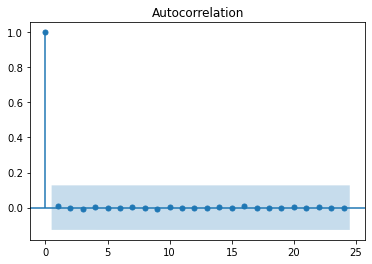

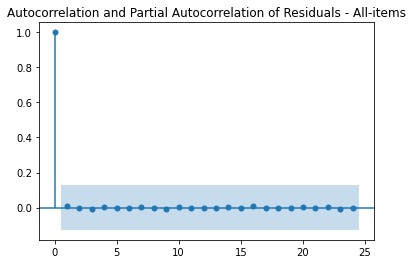

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


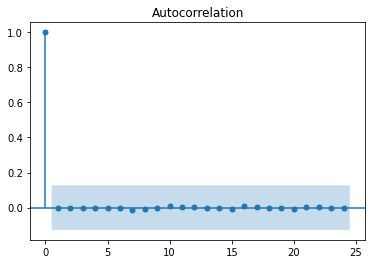

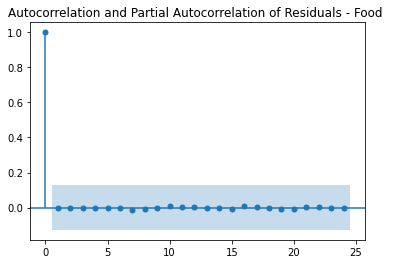

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


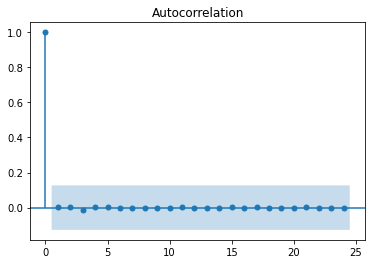

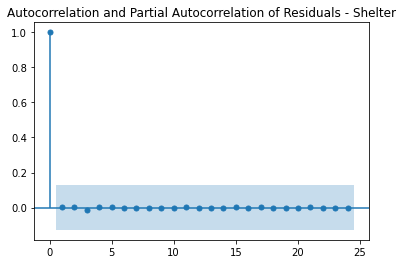

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Owner\OneDrive\Documents\lib\site-package

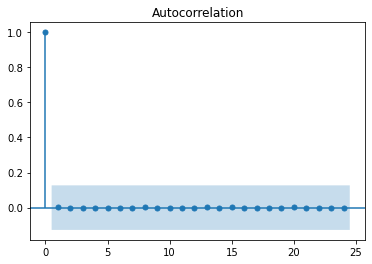

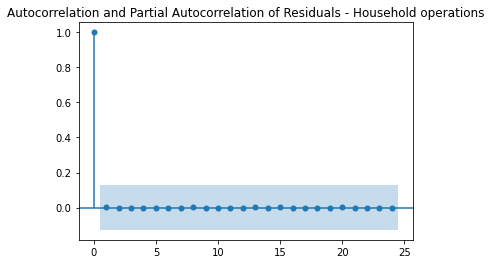

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


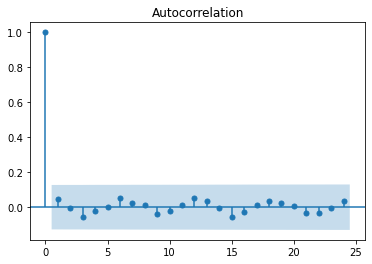

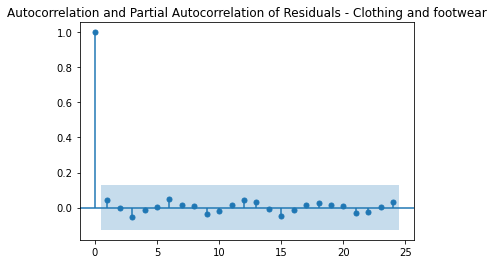

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


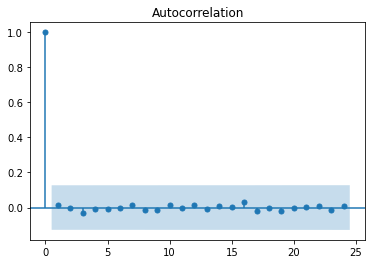

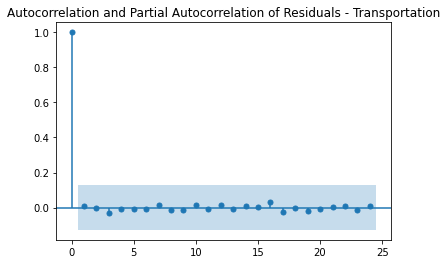

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


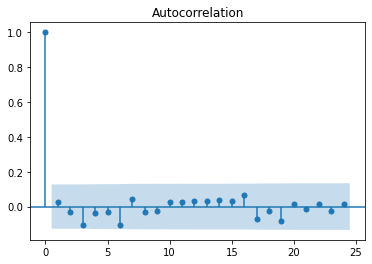

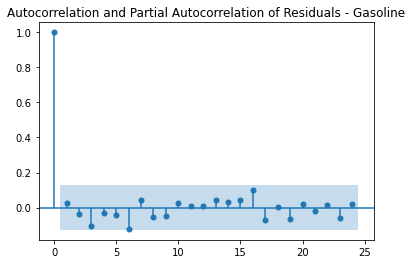

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


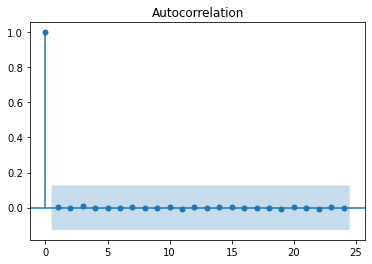

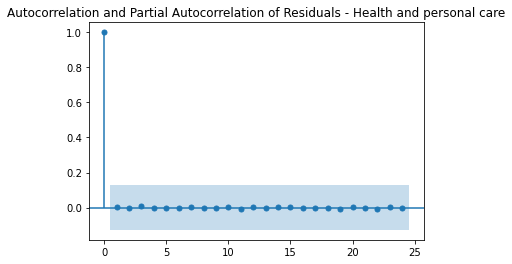

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


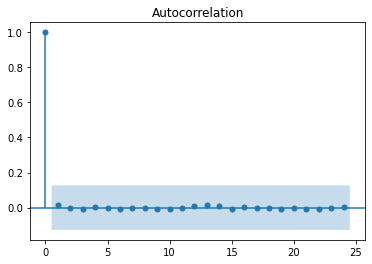

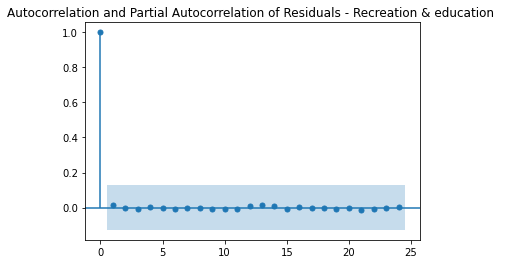

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


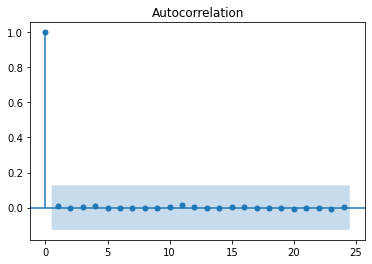

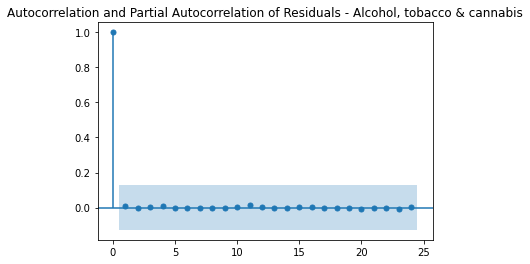

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


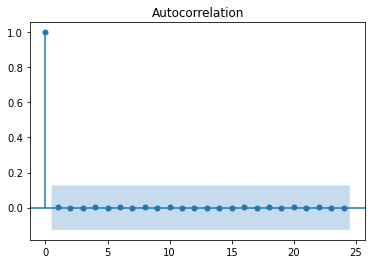

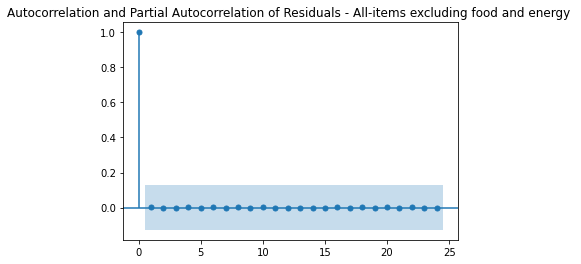

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


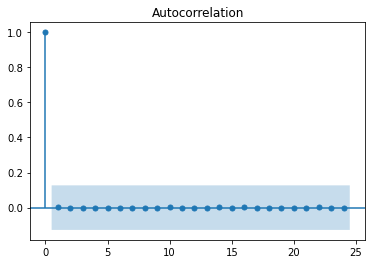

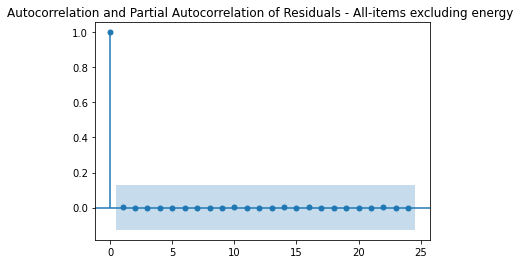

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


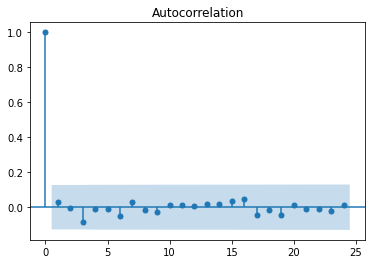

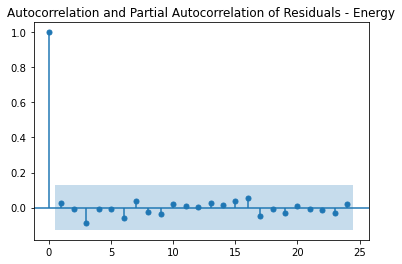

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


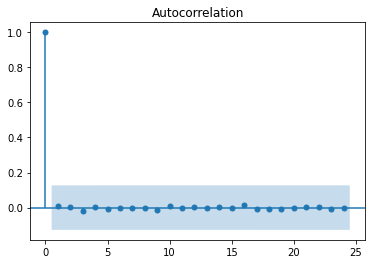

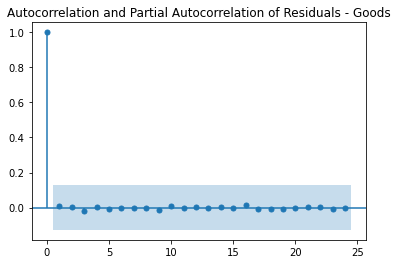

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


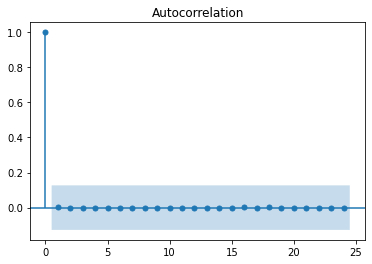

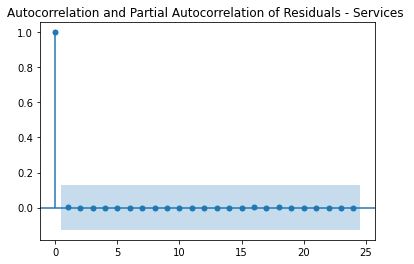

In [21]:
for component in cpi_components:
    # Fit the ARIMA model
    arima_model = ARIMA(train_data[component], order=order)
    arima_model_fit = arima_model.fit()

    # Check model residuals
    residuals = arima_model_fit.resid
    plot_acf(residuals)
    plot_pacf(residuals)
    plt.title(f'Autocorrelation and Partial Autocorrelation of Residuals - {component}')
    plt.show()

    # Forecasting
    forecast = arima_model_fit.forecast(steps=len(test_data))[0]

    forecast_results[component] = forecast

# Step 4: Create DataFrame of forecast results
forecast_df = pd.DataFrame(forecast_results, index=test_data.index)

In [23]:
# Evaluate model performance
mae = mean_absolute_error(test_data.values, forecast_df.values)
rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 5.563188402361942
Root Mean Squared Error (RMSE): 11.620586327850193


### Lasso Regressor 

In [31]:
from sklearn.linear_model import Lasso
# Fit Lasso Regressor models for each component
lasso_models = {}  # Dictionary to store the Lasso models for each component
forecast_results = {}  # Dictionary to store the forecast results for each component
r2_scores = {}  # Dictionary to store the R2 scores for each component



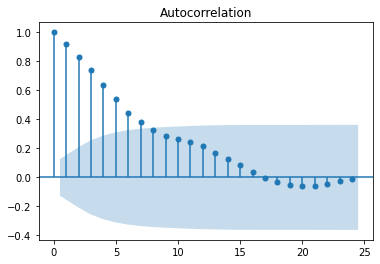

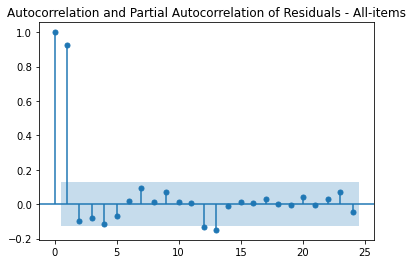

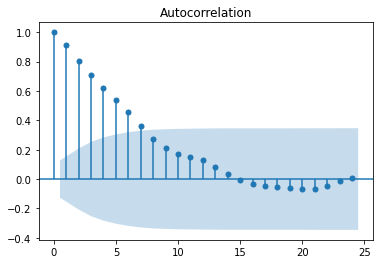

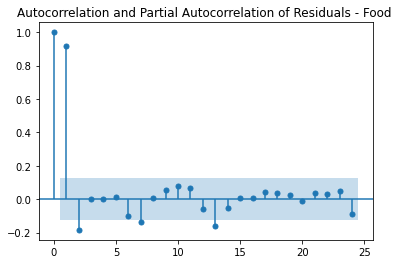

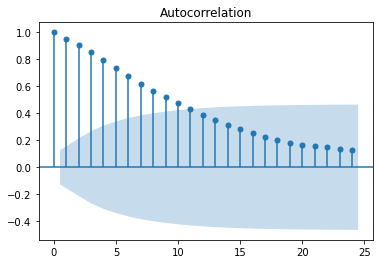

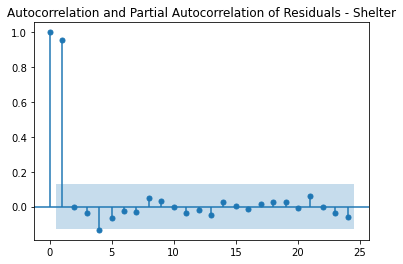

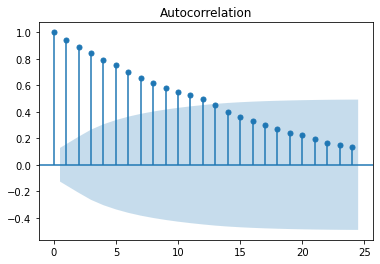

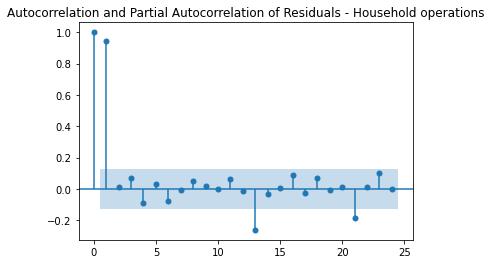

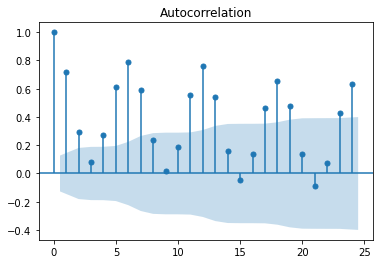

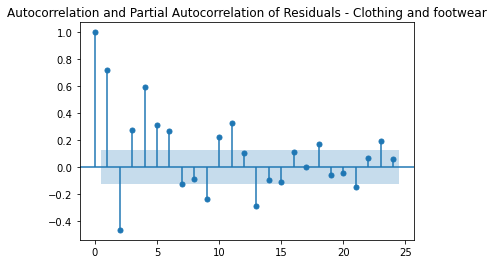

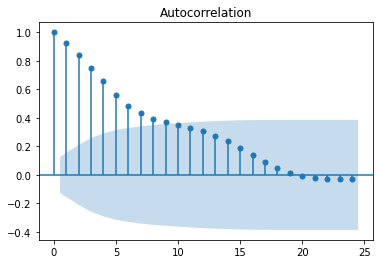

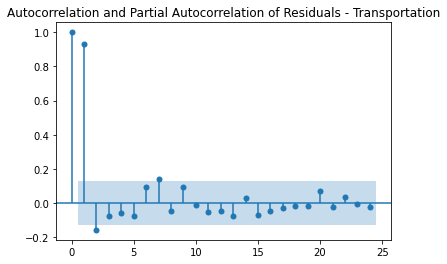

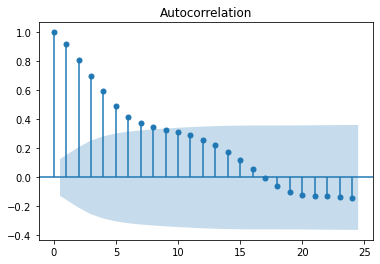

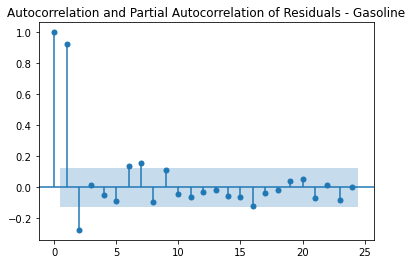

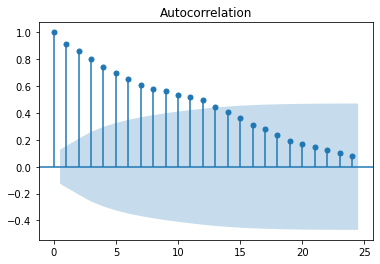

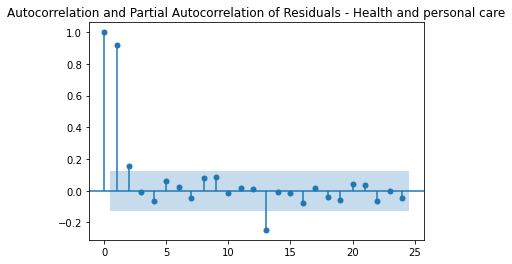

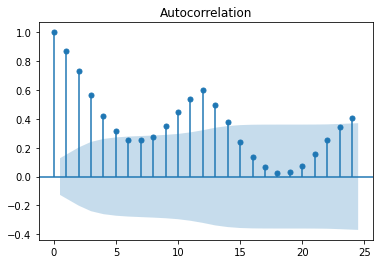

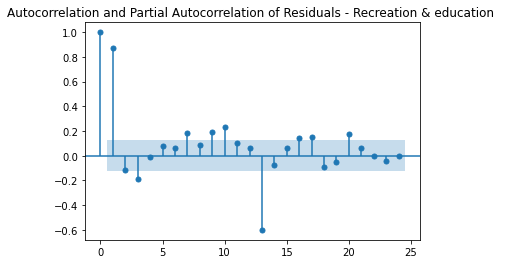

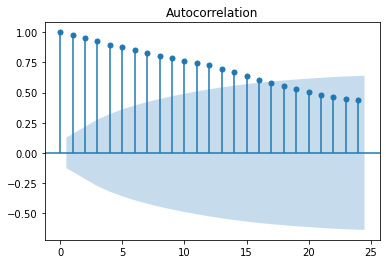

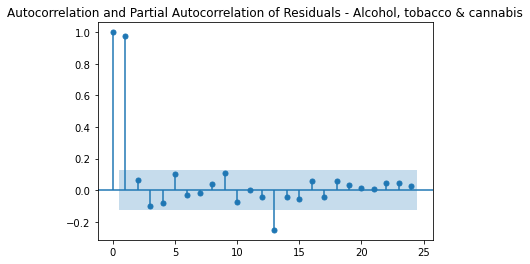

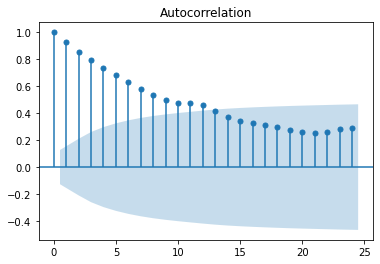

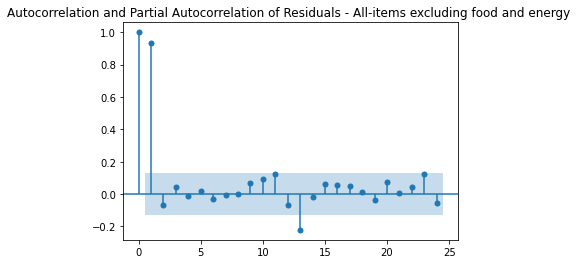

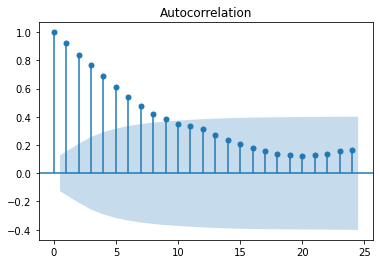

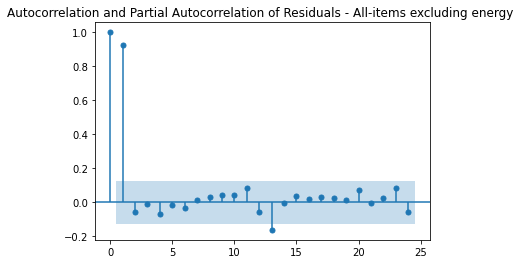

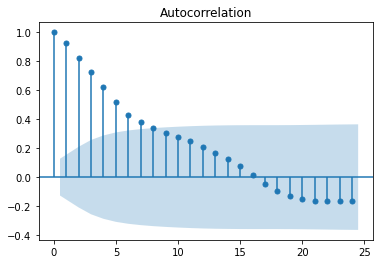

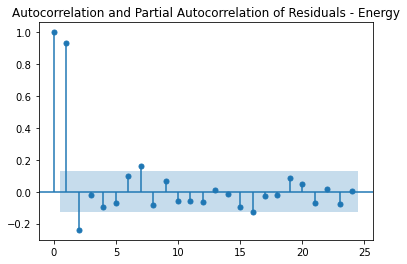

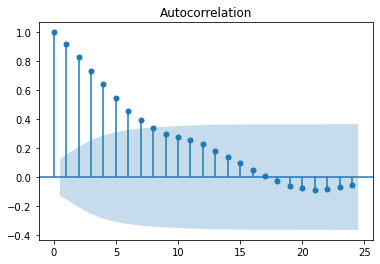

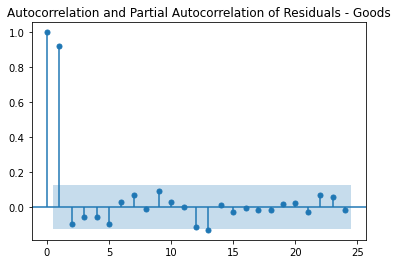

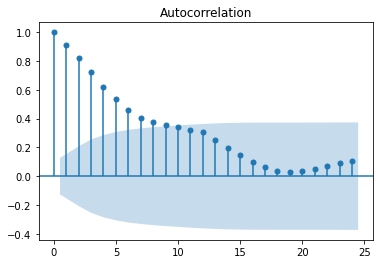

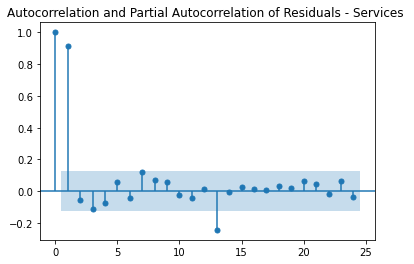

In [32]:
for component in cpi_components:
    # Prepare the training data
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values

    # Fit the Lasso Regressor model
    lasso_model = Lasso()
    lasso_model.fit(X_train, y_train)

    # Check model residuals
    train_predictions = lasso_model.predict(X_train)
    residuals = y_train - train_predictions
    plot_acf(residuals)
    plot_pacf(residuals)
    plt.title(f'Autocorrelation and Partial Autocorrelation of Residuals - {component}')
    plt.show()

    # Prepare the testing data
    X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

    # Forecasting
    forecast = lasso_model.predict(X_test)

    lasso_models[component] = lasso_model
    forecast_results[component] = forecast

    # Calculate R2 score
    r2 = r2_score(test_data[component].values, forecast)
    r2_scores[component] = r2

# Create DataFrame of forecast results
forecast_df = pd.DataFrame(forecast_results, index=test_data.index)




In [34]:
# Evaluate model performance
mae = mean_absolute_error(test_data.values, forecast_df.values)
rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
#print("R2 Scores:")
#for component, r2 in r2_scores.items():
    #print(f"{component}: {r2}")

Mean Absolute Error (MAE): 10.895379661035891
Root Mean Squared Error (RMSE): 13.04215735275879


### Support Vector Regressor 

In [24]:
from sklearn.svm import SVR
#Fit SVR models for each component
svr_models = {}  # Dictionary to store the SVR models for each component
forecast_results = {}  # Dictionary to store the forecast results for each component
r2_scores = {}

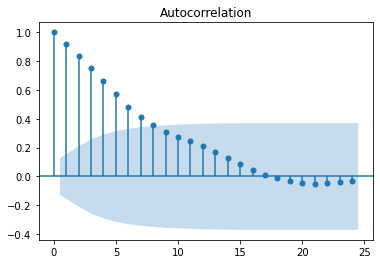

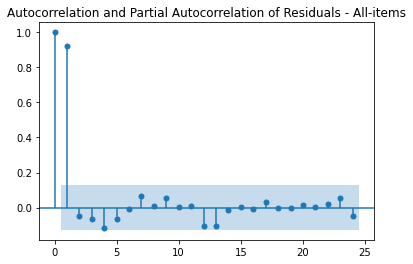

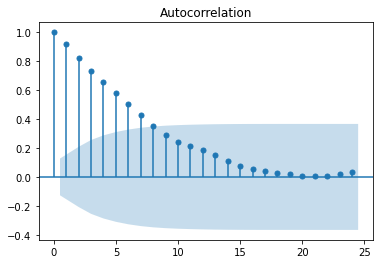

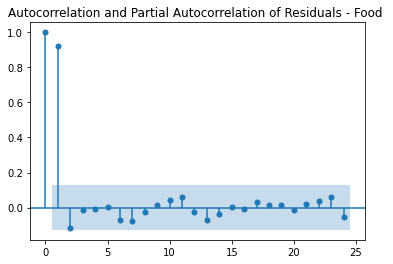

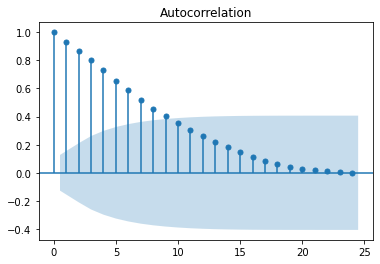

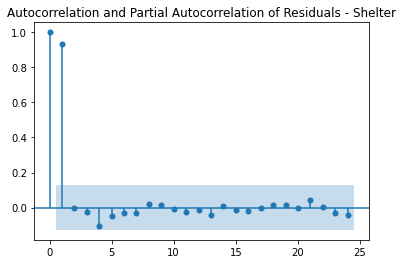

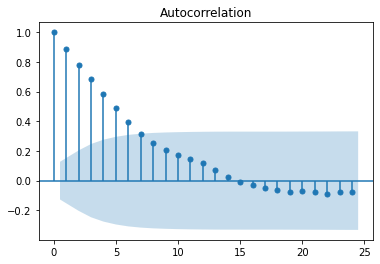

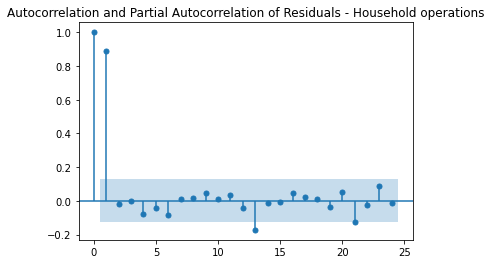

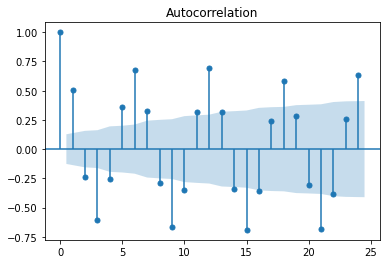

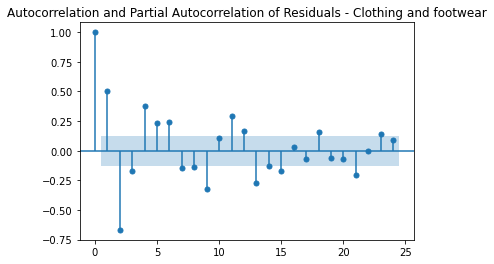

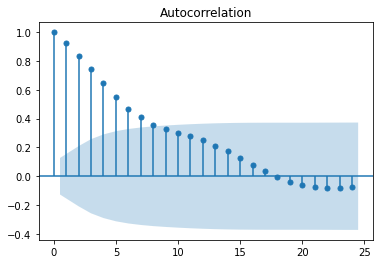

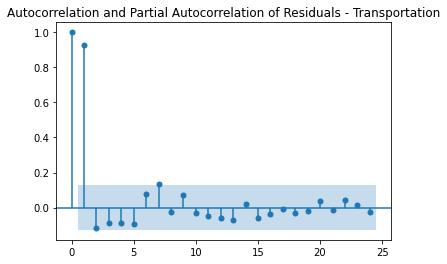

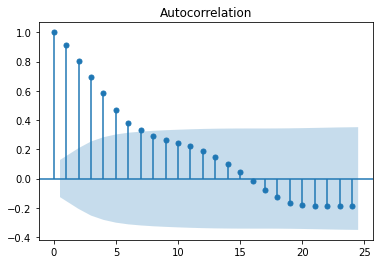

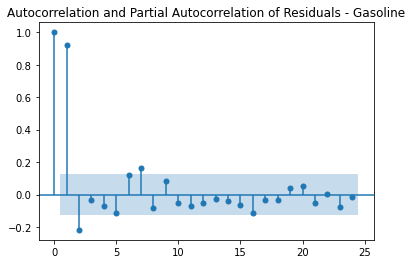

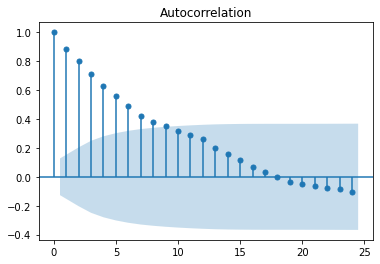

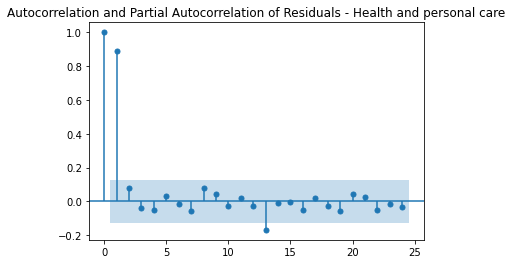

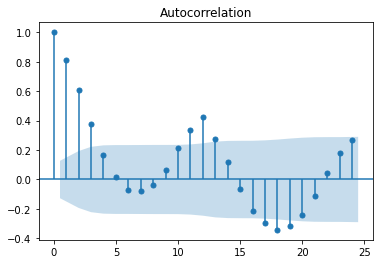

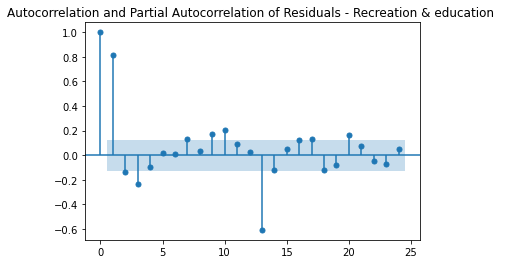

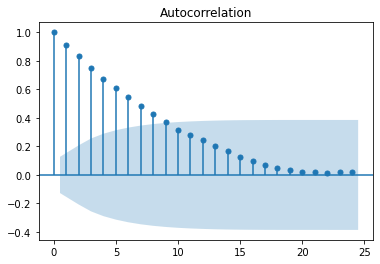

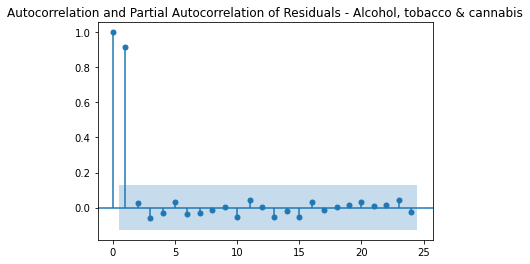

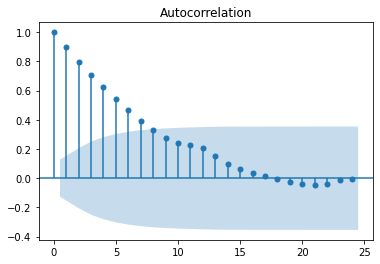

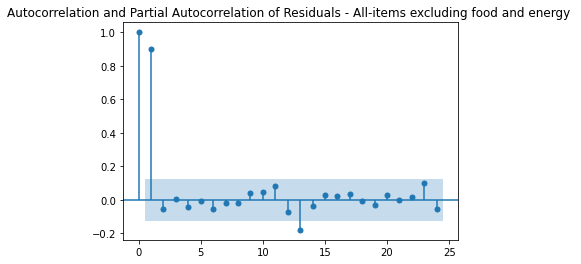

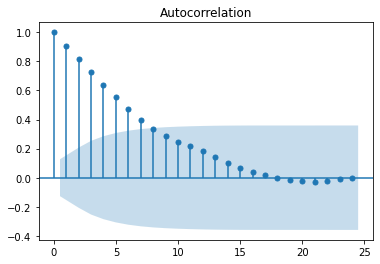

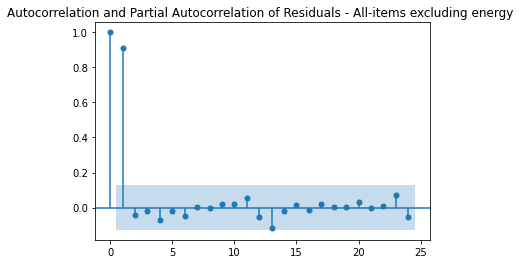

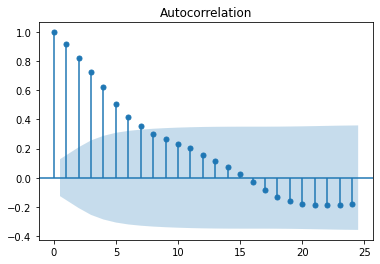

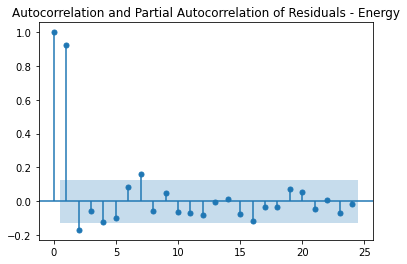

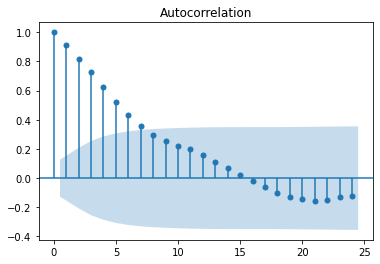

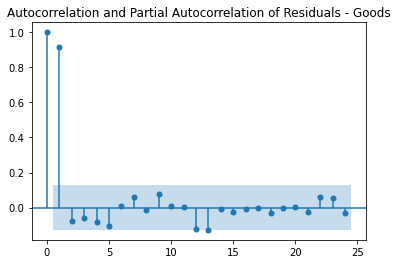

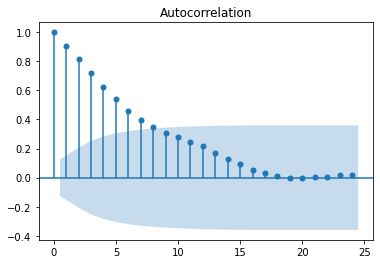

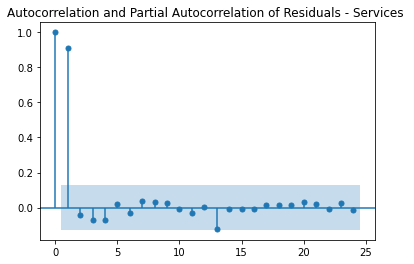

In [25]:
for component in cpi_components:
    # Prepare the training data
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values

    # Fit the SVR model
    svr_model = SVR()
    svr_model.fit(X_train, y_train)

    # Check model residuals
    train_predictions = svr_model.predict(X_train)
    residuals = y_train - train_predictions
    plot_acf(residuals)
    plot_pacf(residuals)
    plt.title(f'Autocorrelation and Partial Autocorrelation of Residuals - {component}')
    plt.show()

    # Prepare the testing data
    X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

    # Forecasting
    forecast = svr_model.predict(X_test)

    svr_models[component] = svr_model
    forecast_results[component] = forecast

    # Calculate R2 score
    r2 = r2_score(test_data[component].values, forecast)
    r2_scores[component] = r2

# Create DataFrame of forecast results
forecast_df = pd.DataFrame(forecast_results, index=test_data.index)

In [27]:
#Evaluate model performance
mae = mean_absolute_error(test_data.values, forecast_df.values)
rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
#print("R2 Scores:")
#for component, r2 in r2_scores.items():
    #print(f"{component}: {r2}")

Mean Absolute Error (MAE): 18.805509908406865
Root Mean Squared Error (RMSE): 23.145814941636363


### Random Forest Regressor 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Step 3: Fit Random Forest Regressor models for each component
rf_models = {}  # Dictionary to store the Random Forest models for each component
forecast_results = {}  # Dictionary to store the forecast results for each component
r2_scores = {}  # Dictionary to store the R2 scores for each component

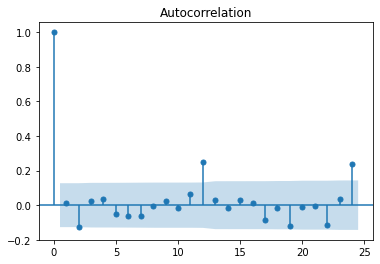

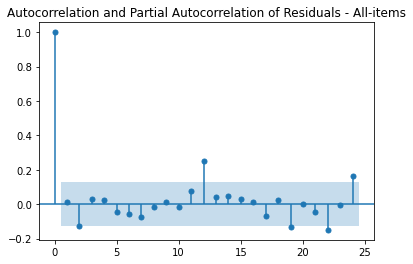

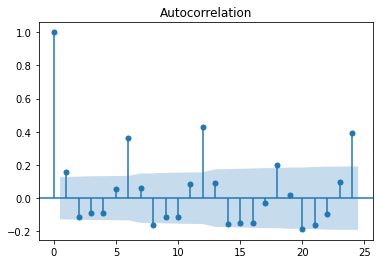

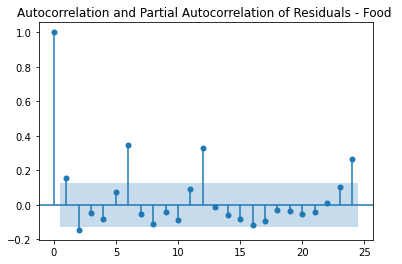

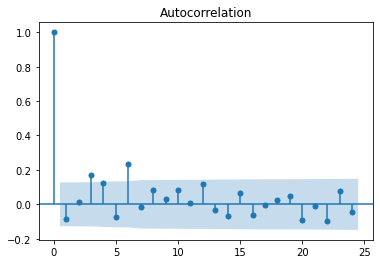

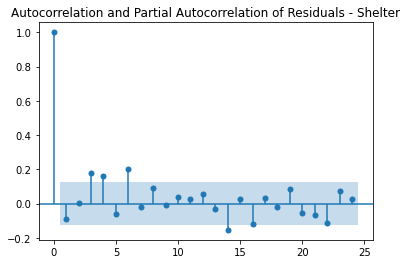

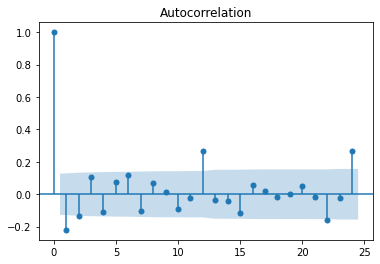

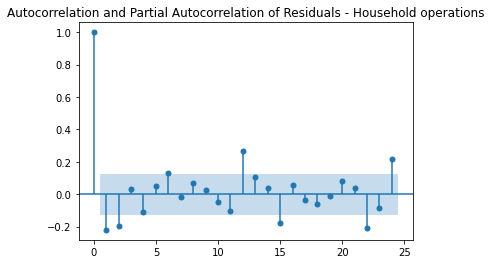

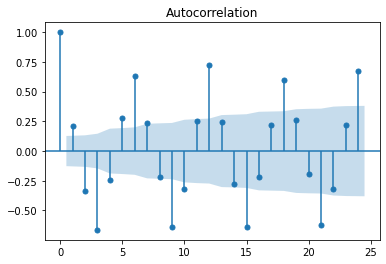

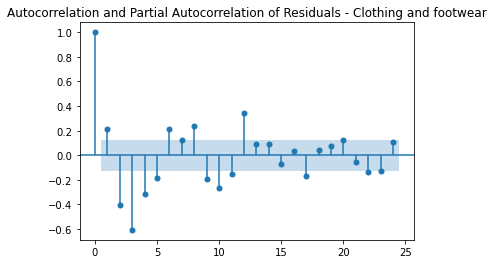

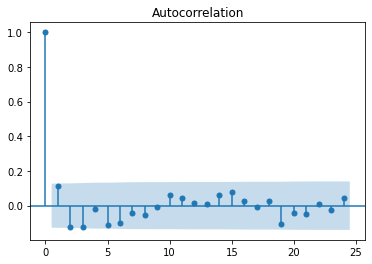

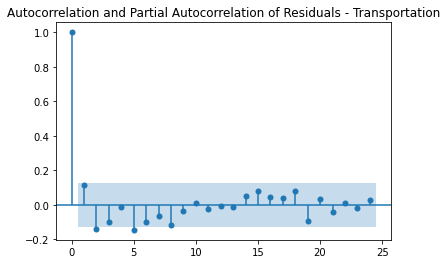

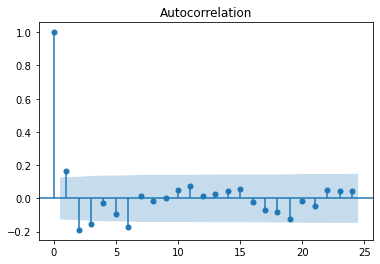

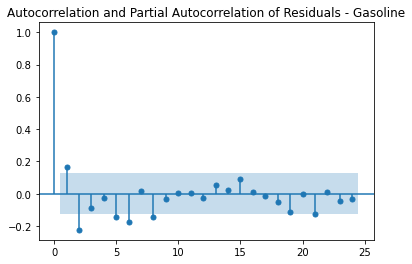

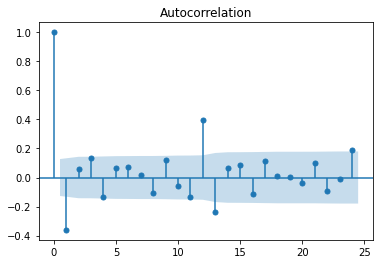

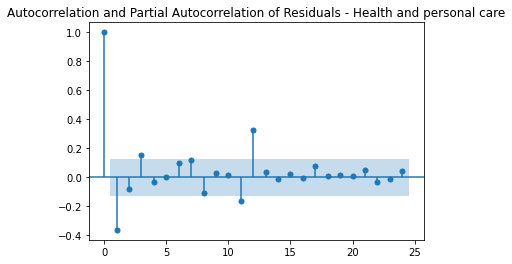

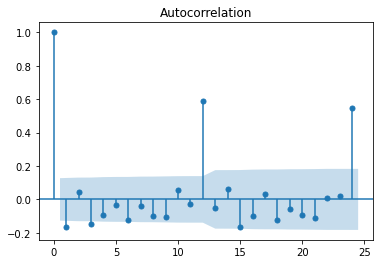

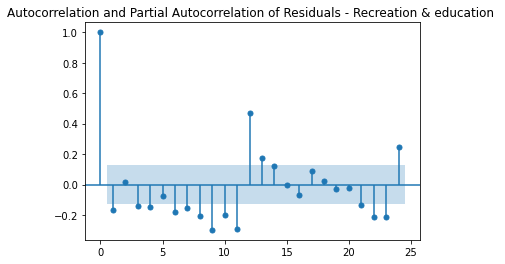

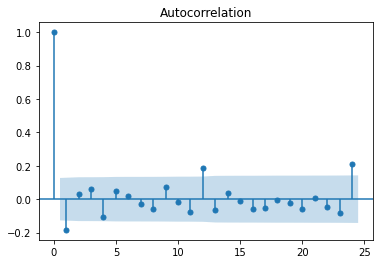

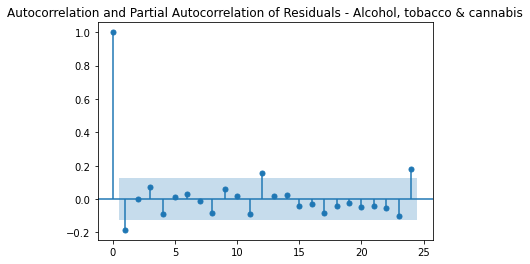

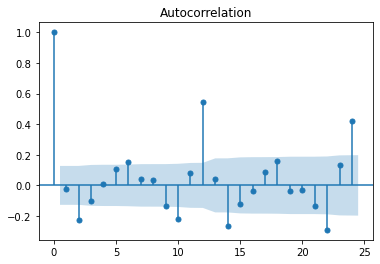

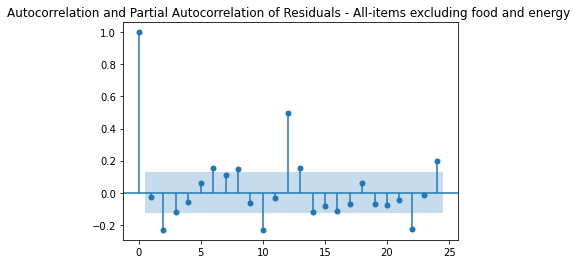

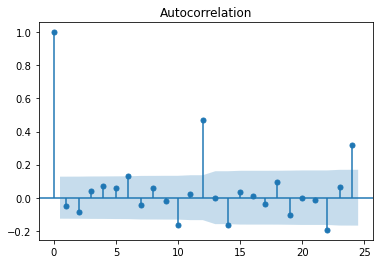

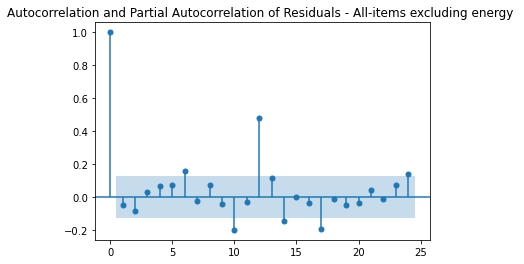

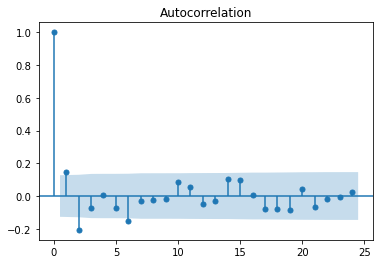

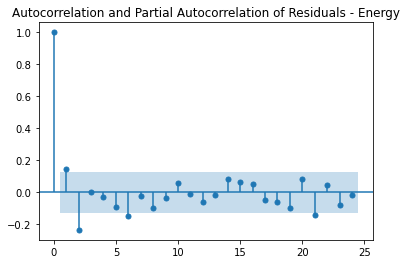

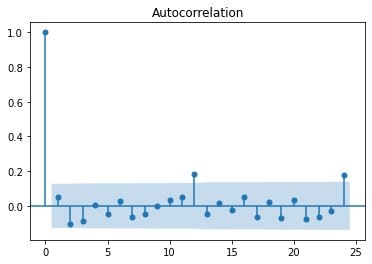

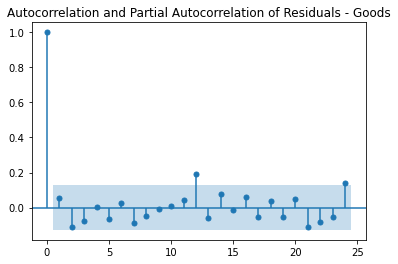

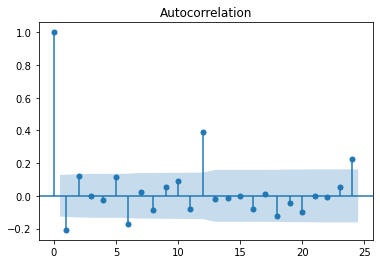

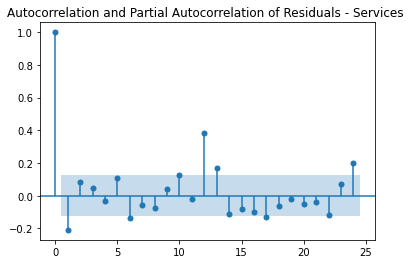

In [28]:
for component in cpi_components:
    # Prepare the training data
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values

    # Fit the Random Forest Regressor model
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # Check model residuals
    train_predictions = rf_model.predict(X_train)
    residuals = y_train - train_predictions
    plot_acf(residuals)
    plot_pacf(residuals)
    plt.title(f'Autocorrelation and Partial Autocorrelation of Residuals - {component}')
    plt.show()

    # Prepare the testing data
    X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

    # Forecasting
    forecast = rf_model.predict(X_test)

    rf_models[component] = rf_model
    forecast_results[component] = forecast

    # Calculate R2 score
    r2 = r2_score(test_data[component].values, forecast)
    r2_scores[component] = r2

#Create DataFrame of forecast results
forecast_df = pd.DataFrame(forecast_results, index=test_data.index)




In [30]:
# Step 5: Evaluate model performance
mae = mean_absolute_error(test_data.values, forecast_df.values)
rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
#print("R2 Scores:")
#for component, r2 in r2_scores.items():
    #print(f"{component}: {r2}")

Mean Absolute Error (MAE): 4.510355555555535
Root Mean Squared Error (RMSE): 8.381935281703493
